In [35]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt   
import seaborn as sns
from collections import  Counter
import spacy
from spacy import displacy
import enchant
from nltk.tokenize import MWETokenizer

In [195]:
df = pd.read_csv('After_Cleaning.csv')

In [196]:
# Dropping all the string columns
df.drop(['Reviews','Reviews_link','Tokenized','Updated_Review'],axis=1,inplace=True)

In [197]:
# Dropping the columns that directly related to the target column
df.drop(['Review_rate','Total_rate','Ratings_number','Reviews_number'],axis=1,inplace=True)

In [198]:
# Dropping the columns without any relation to the data
df.drop(['Month_of_book','Review_day','Review_month','Other_words'],axis=1,inplace=True)

In [199]:
# Multiplying columns
df['Positive_con'] = (df['Positive']+1)*(df['i_love_this_book']+2*df['i_loved_this_book']+0.75*df['loved_this_book']+
                                    0.5*df['love_this_book']+df['one_of_the_best_books']+0.8*df['best_book']+df['love'])
df['Negative_con'] = 5*(df['Negative']+1)*(df['worst_book']+df['one_of_the_worst_books']+df['i_hate_this_book']+ 
                                     0.6*df['not_good'])

In [200]:
df['relation'] = (df['Positive_con'])/(df['Negative_con'])
df.drop(['Positive_con','Negative_con'],axis=1,inplace=True)
binar = []
for r in df['relation']:
    if r>=1:
        binar.append(1)
    else:
        binar.append(0)
df['relation_binary']= binar
df.drop('relation',axis=1,inplace=True)

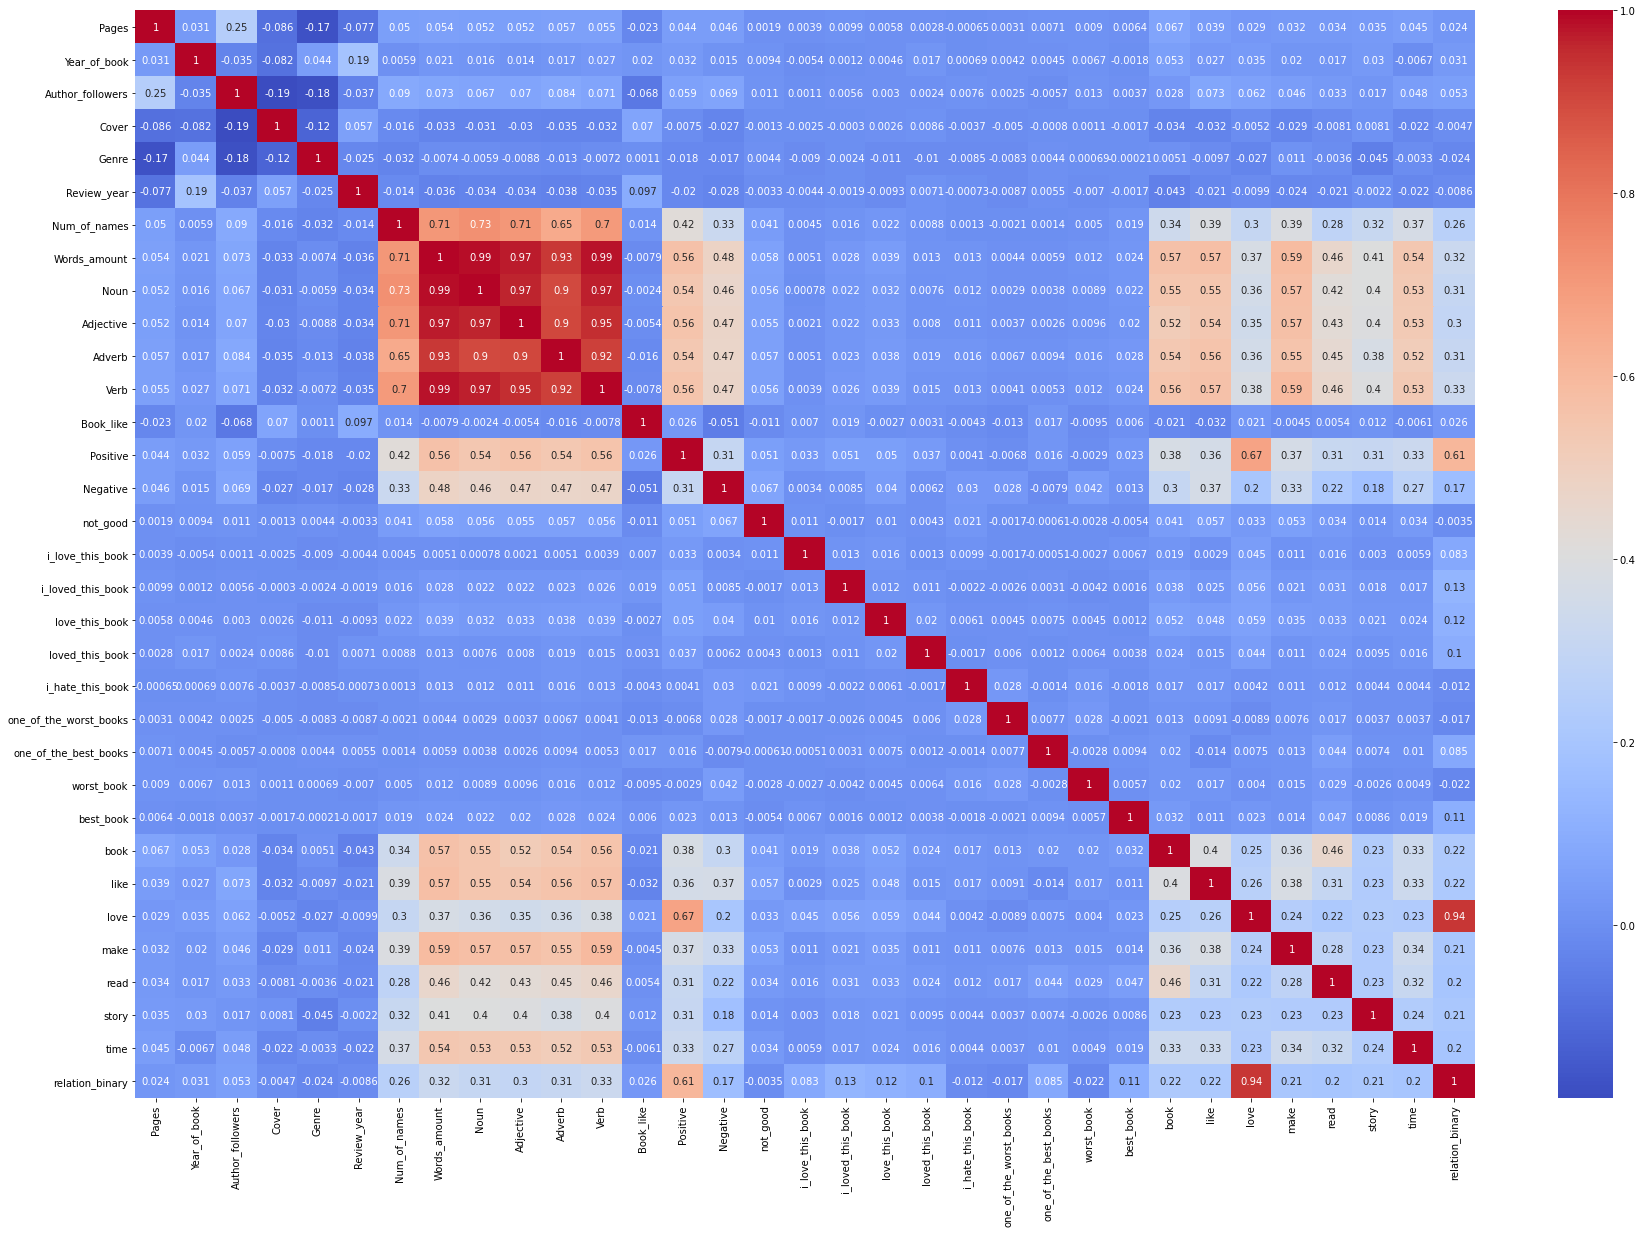

In [201]:
f, ax = plt.subplots(figsize=(30, 20))
corrMatrix = df.corr('spearman') 
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

In [202]:
df.to_csv('For_ML.csv',index=False)